# Introduction

We're told by our colleagues at the hypothetical company that customer churn is at 50% within 3 months. That means that within 3 months of a set of customers that sign up for the paid product, by the end of 3 months half of them will have cancelled. This is an urgent problem we need to help fix with machine learning!


## Metadata

Here are some types of data that are useful in customer churn analysis:
* Customer ID or other identification information
* Date the customer was acquired
* How the customer was acquired (source of sale i.e. referral, web signup, etc.)
* Plan type (what subscription they are on)
* Cohort analysis by user type (seasonal onboards by marketing campaign or time of year, etc.)
* If they use add ons (sush as Online Security or Device Protection)?
* Have they set up to pay for their subscription online?
* Customer size
* Customer segment type (i.e. company user, accountant)
* Customer country of residence
* Customer state of residence
* NPS score (satisfaction level 0-10 from questionnaire)
* Time to first success moment (days)
* Total number of times logged in
* Time since last login
* Days since key inflection points (work with SME in marketing/product) this could be days since logging in, since getting their first result from the technology, etc.
* Time spent logged in past month
* Time spent logged in average/mo for length of subscription
* Number of times they have contacted customer service over life of subscription
* Number of customer service calls in the prior month that they cancelled
* Number of times they opened and clicked on the Help text in the app or online
* What they typed into the search box in the help text in the app
* Tenure (Lifetime account duration in days)
* Total subscription amount paid
* Date unsubscribed (timestamp)
* How many other products they have from our company
* What other products they have from our company, as a separate column for each (yes / no)
* Anything else specific to the business of note
* Cancelled yes or no (Churn)

# Install & Load Library

In [1]:
!pip install dalex
!pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=14581261851cb6a6d1fa1928ac261746947df282f7cc4c8c03d3dcc38ff6ef30
  Stored in directory: /root/.cache/pip/wheels/17/0a/3a/8c988bdca6acd7ce4aa949726b26c382ad1635e065bf83a175
Successfully built dalex


In [2]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

# load scikitplot untuk visualisasi metrik
import scikitplot as skplt

%matplotlib inline

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.12/dist-packages/scipy/__init__.py)

# Load Dataset

In [ ]:
# load dataset ke raw_data
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/telco_customer_churn/Telco-Customer-Churn.csv")

# Data Inspection

Soal 1:

1. Cek struktur data
2. Cek nilai yang hilang
  - Jika ada nilai yang hilang, masuk dalam kategori apakah data yang hilang tersebut (MNAR, MCAR, MAR)? Jelaskan alasan anda
  - Apa yang akan anda lakukan pada data yang hilang tersebut? Jelaskan alasan anda

In [ ]:
# cek struktur data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check missing values

In [ ]:
raw_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

But wait, it pretty strange that `TotalCharges` is `Object` data type, we need to change it to numeric data type.

In [ ]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors = 'coerce')

Check again because probably the NA values will appear due to data type coersion

In [ ]:
raw_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
raw_data[raw_data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
raw_data.query('tenure == 0')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Because most of NA `TotalCharges` has 0 tenure, we can impute this value with `0`


In [ ]:
raw_data[raw_data['TotalCharges'].isna()] = 0

Check null values again

In [ ]:
raw_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Typecasting categorical variables into numeric

In [ ]:
raw_data['gender'].replace(['Male','Female'],[0,1],inplace=True)
raw_data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
raw_data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
raw_data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
raw_data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
raw_data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

Check new data structure

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


We need to remove Customer ID from dataset

In [ ]:
raw_data = raw_data.drop(["customerID"], axis = 1)

# Train-Test Split Data

Split data before data exploration and engineering

In [ ]:
X = raw_data.drop(["Churn"], axis = 1)
y = raw_data["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

# Data Exploration

In [ ]:
X_train["Churn"] = y_train

Let's check target distribution

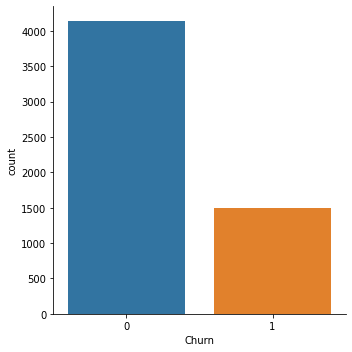

In [ ]:
sns.catplot(x = "Churn", kind = "count", data = X_train);

In [ ]:
y_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

We can observe there imbalance case in our dataset. We can solve this in two ways:

- While modeling, by adding weight on model parameter
- Post-modeling, by changing classification threhold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do pre-modelling oversampling if necessary

Next we gonna check multicolinearity for each variable


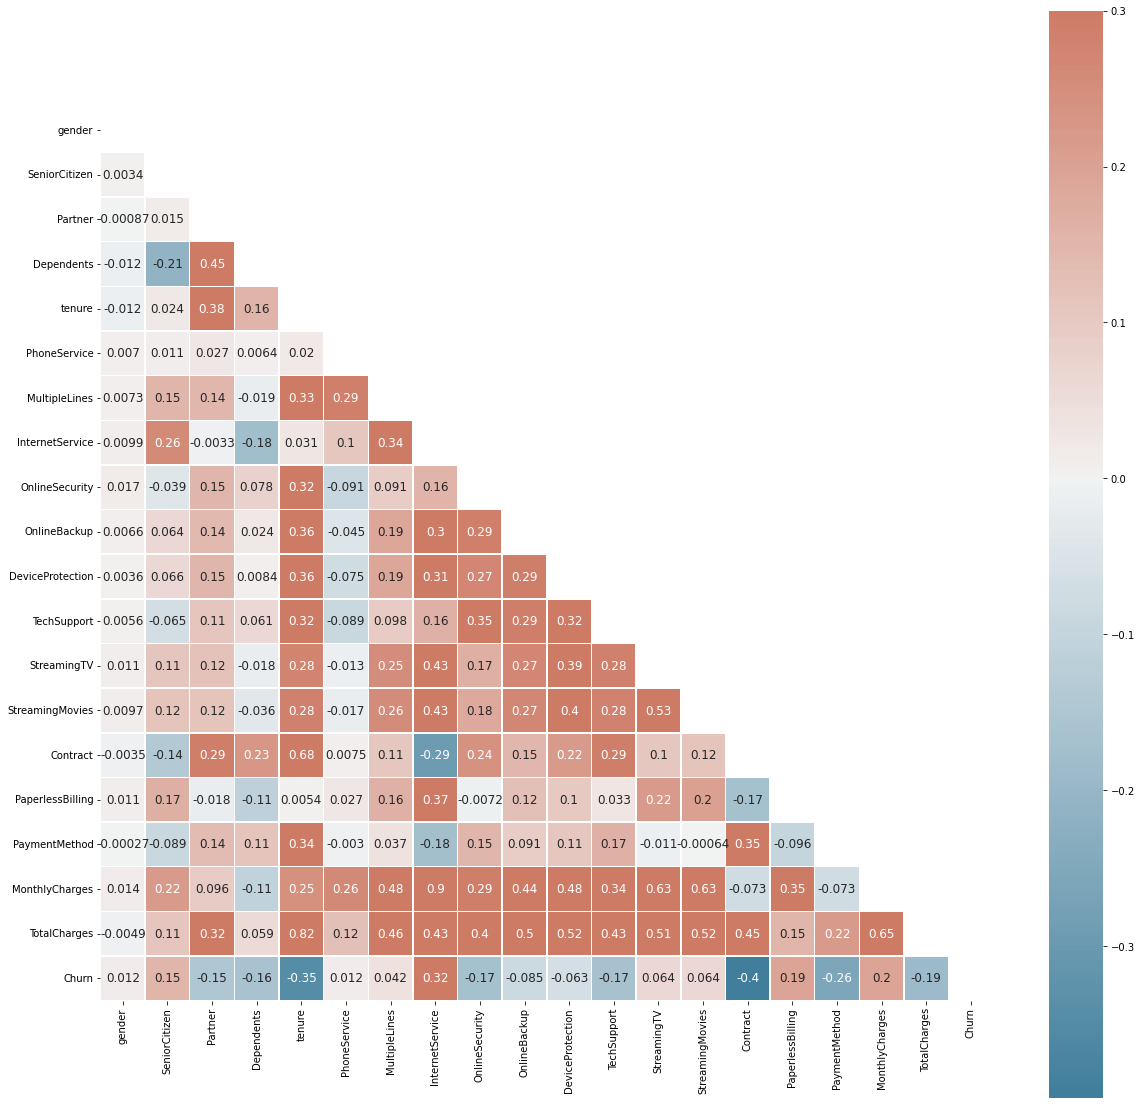

In [ ]:
corr = X_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=masking,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

We observe multiple multicolinearity between predictor variables such as tenure vs Total charges, Contract vs Tenure, StreamingTV vs MonthlyCharges, etc.

## Categorical Data vs Churn

In [ ]:
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

In [ ]:
prop_agg(X_train, "gender", "Churn")

,gender,Churn,size,prop
0,0,0,2121,0.739798
1,0,1,746,0.260202
2,1,0,2018,0.729310
3,1,1,749,0.270690


**Gender vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


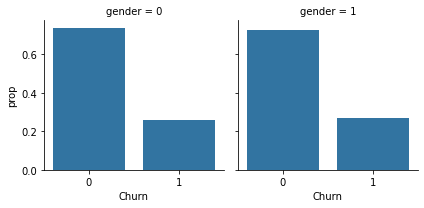

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "gender", "Churn"),
    col = "gender"
)
g.map(sns.barplot, "Churn", "prop");

We can observe that male or female has the same churn rate, we can:
- remove this because gender is one of protected features that need to be removed from dataset
- remove this feature because is has no benefit to improve model accuracy


**Senior Citizen vs Churn**


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


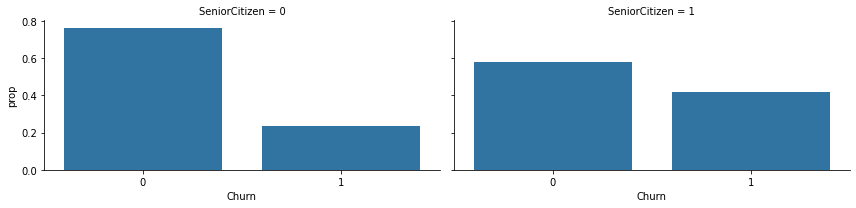

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "SeniorCitizen", "Churn"),
    col = "SeniorCitizen",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

It seems that there is correlation between user as senior citizen and probability to churn. It seems that non-senior citizen rarely to churn from services.


**Partner vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


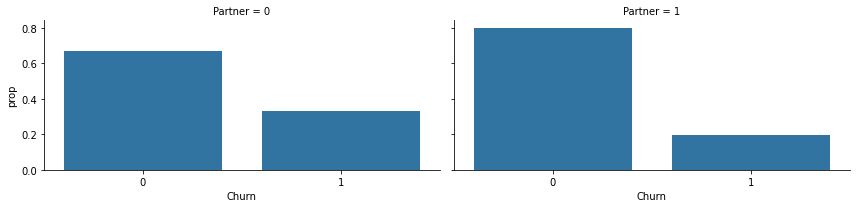

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "Partner", "Churn"),
    col = "Partner",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

It seems that people with life partner is less likely to churn than has no partner.


**Dependent vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


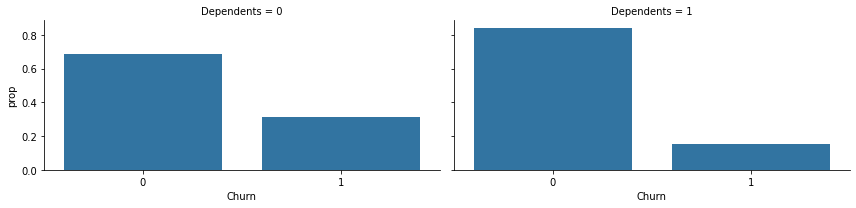

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "Dependents", "Churn"),
    col = "Dependents",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that people with dependents such as kids, parents, etc less likely to churn than no dependent.


**Online Security vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


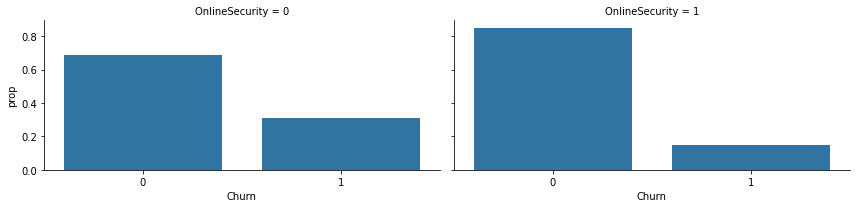

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "OnlineSecurity", "Churn"),
    col = "OnlineSecurity",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that if user subscribe to online security service we provide, less likely they will churn.

**Online Backup vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


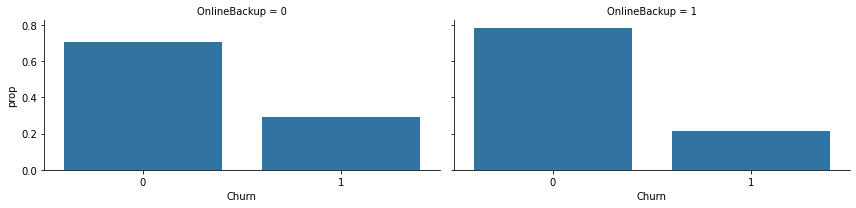

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "OnlineBackup", "Churn"),
    col = "OnlineBackup",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that if user subscribe to online backup service we provide, less likely they will churn.

**Device Protection vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


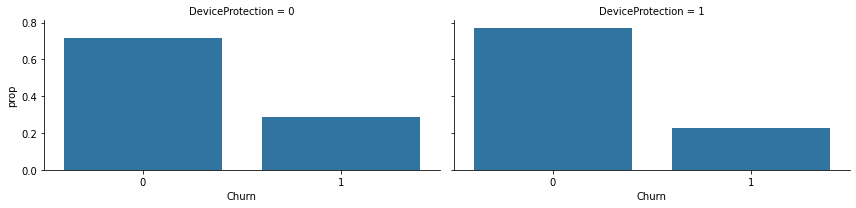

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "DeviceProtection", "Churn"),
    col = "DeviceProtection",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that if user subscribe to device protection service we provide, less likely they will churn.

**Streaming TV vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


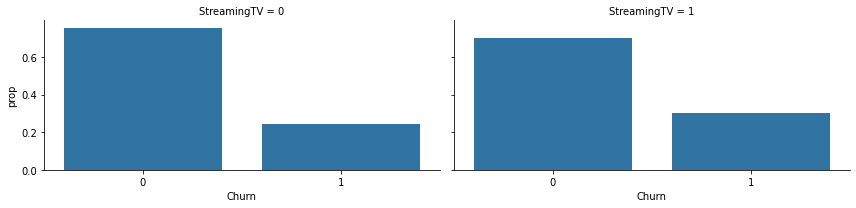

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "StreamingTV", "Churn"),
    col = "StreamingTV",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that if user subscribe to streaming TV service we provide, more likely they will churn.

**Streaming Movies vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


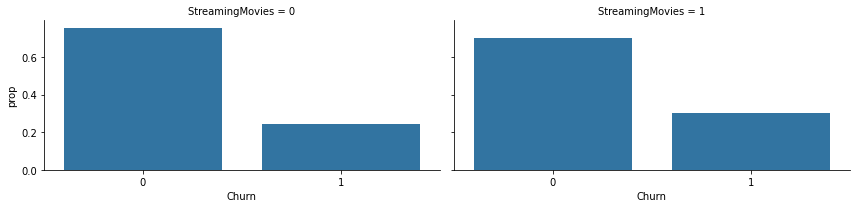

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "StreamingMovies", "Churn"),
    col = "StreamingMovies",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that if user subscribe to streaming movies service we provide, more likely they will churn.

**Contract vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


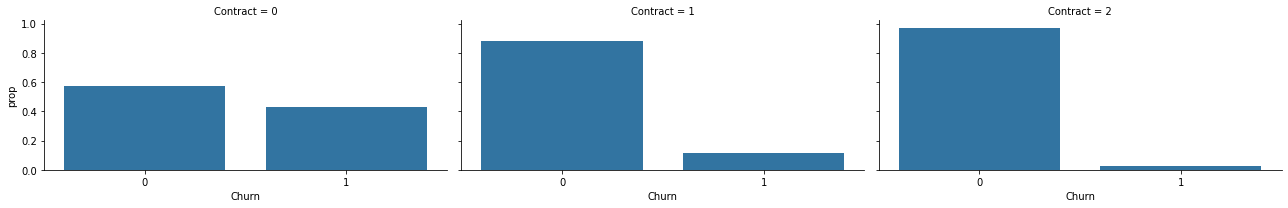

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "Contract", "Churn"),
    col = "Contract",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

It seems that Month-to-Month contract (0) user has higher probability to churn compared to One-Year (1) and Two-Year (2) contract.

**Tech Support vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


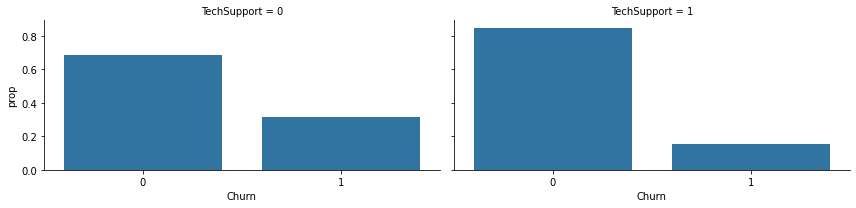

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "TechSupport", "Churn"),
    col = "TechSupport",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

People that use tech support less likely to churn.

**Paperless Billing vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


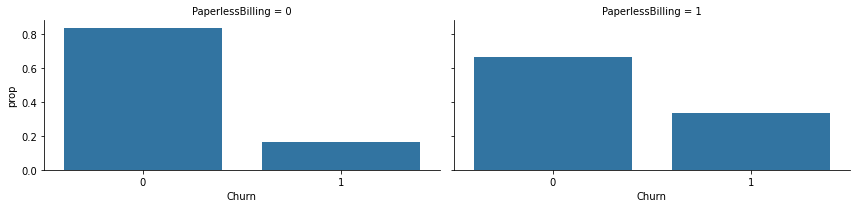

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "PaperlessBilling", "Churn"),
    col = "PaperlessBilling",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

It's interesting to note that user that request paperless billing is more likely to churn.

**Payment Method vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


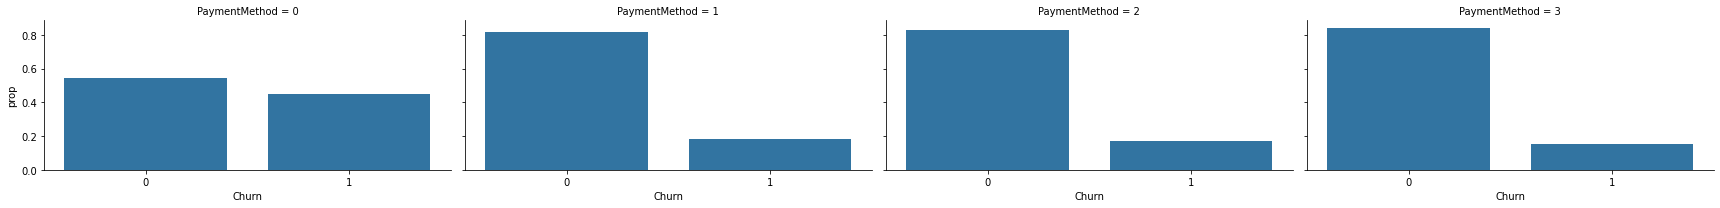

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "PaymentMethod", "Churn"),
    col = "PaymentMethod",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

People who use electronic check (0) has high probability to churn compared to other payment methods such as mailed check (1), bank transfer (2), and credit card (3)

**Phone Service vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


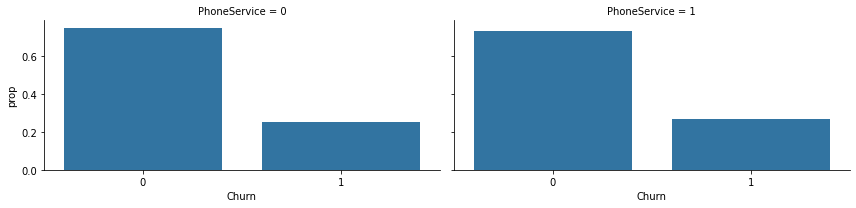

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "PhoneService", "Churn"),
    col = "PhoneService",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

We can observe that phone service has no correlation to churn.

**Internet Service vs Churn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


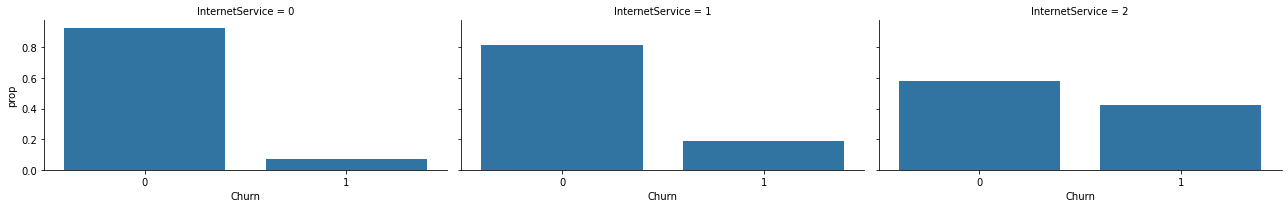

In [ ]:
g = sns.FacetGrid(
    data = prop_agg(X_train, "InternetService", "Churn"),
    col = "InternetService",
    aspect = 2
)
g.map(sns.barplot, "Churn", "prop");

People who use Fiber Optic (2) has high probability to churn compared to other other internet service such as DSL (1) or not subscribe at all

## Numerical Data vs Churn

**Total Charges vs Churn**

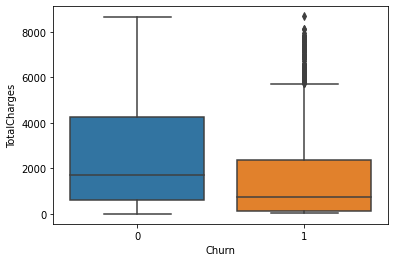

In [ ]:
sns.boxplot(x = "Churn", y = "TotalCharges", data = X_train);

We can observe there difference between two groups. Most of people who has greater lifetime charge less likely to churn.

**Monthly Charges vs Churn**

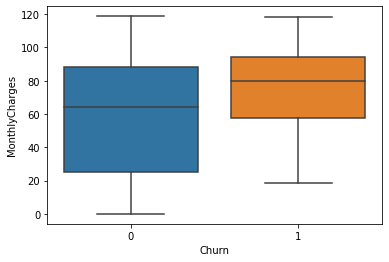

In [ ]:
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = X_train);

We can observe there difference between two groups. Most of people who pay greater monthly charge less likely to churn.

**Tenure**

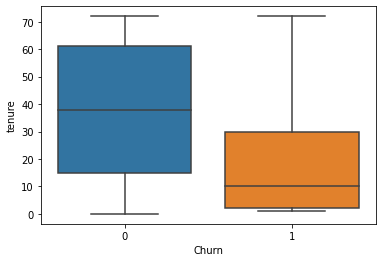

In [ ]:
sns.boxplot(x = "Churn", y = "tenure", data = X_train);

Also, we can observe the one who already has long tenure less likely to churn.

Before we start modeling, we need to drop "Churn" column from X_train

In [ ]:
X_train = X_train.drop(["Churn"], axis = 1)

# Modeling

## Define Model

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost


In [ ]:
y_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5,
    # class_weight = {0: 0.265353, 1:0.734647}
)

**Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.265353, 1:0.734647}
)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

**SVM RBF**

In [ ]:
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.265353, 1:0.734647}
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

## Fitting Model to Data

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.265353, 1: 0.734647},
                       max_depth=5)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.265353, 1: 0.734647},
                       n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265353, 1: 0.734647}, probability=True,
    random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.265353, 1: 0.734647}, n_estimators=1000,
              random_state=1000)

## Model Evaluation

In [ ]:
X_train.shape

(5634, 19)

In [ ]:
X_test.shape

(1409, 19)

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.820746,0.570968,0.765791,0.695857,0.754446
recall,0.871498,0.473262,0.765791,0.672380,0.765791
f1-score,0.845361,0.517544,0.765791,0.681452,0.758346
support,1035.000000,374.000000,0.765791,1409.000000,1409.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


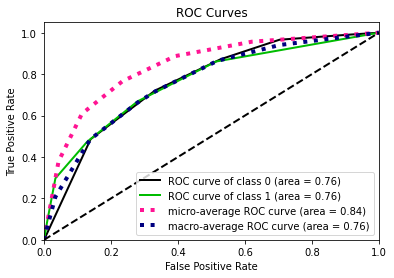

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

**Decision Tree**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.916049,0.510851,0.74379,0.713450,0.808495
recall,0.716908,0.818182,0.74379,0.767545,0.743790
f1-score,0.804336,0.628983,0.74379,0.716659,0.757791
support,1035.000000,374.000000,0.74379,1409.000000,1409.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


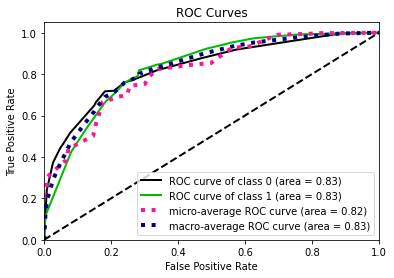

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**Random Forest**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.837887,0.630225,0.792051,0.734056,0.782766
recall,0.888889,0.524064,0.792051,0.706477,0.792051
f1-score,0.862635,0.572263,0.792051,0.717449,0.785559
support,1035.000000,374.000000,0.792051,1409.000000,1409.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


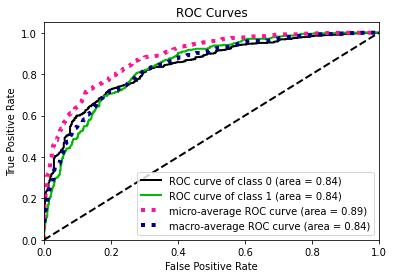

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

**SVM RBF**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.823600,0.396491,0.650816,0.610045,0.710229
recall,0.667633,0.604278,0.650816,0.635955,0.650816
f1-score,0.737460,0.478814,0.650816,0.608137,0.668806
support,1035.000000,374.000000,0.650816,1409.000000,1409.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


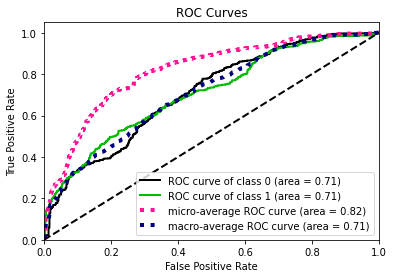

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

**XGBoost**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.847538,0.603399,0.786373,0.725469,0.782735
recall,0.864734,0.569519,0.786373,0.717127,0.786373
f1-score,0.856050,0.585970,0.786373,0.721010,0.784361
support,1035.000000,374.000000,0.786373,1409.000000,1409.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


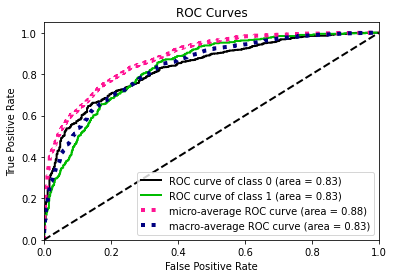

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

## Task

1. Something wrong with the analysis? Write your arguments about what's wrong with the analysis we've been done and fix it based on your solution
2. Check the performance after you fix the workflow/model/anything you think it's wrong
3. Interpret model by using DALEX and write your conclusion about the interpretation itself: Permutation Feature Importance and Partial Dependence Plot
